In [1]:
import os
import os.path
import torch

import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.utils.data as data

from csfnst.fastneuralstyle.networks import StylizedNet, BottleneckType
from csfnst.utils import load_image, plot_image_tensor, save_image_tensor

from IPython.core.display import display, HTML
from time import time
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

force_cpu = True
checkpoints_path = '../checkpoints/'
device = torch.device('cuda' if torch.cuda.is_available() and not force_cpu else 'cpu')
content_sizes = [256, 512, 768, 1024]
style_sizes = [256, 512, 768, 1024]
image_path = '../images/content/brad_pitt_01.jpg'
image = load_image(image_path).to(device)

# '../images/content/brad_pitt_01.jpg',
# '../images/content/golden_gate_01.jpg',
# '/home/christoph/.datasets/coco_super_tiny/train/COCO_test2014_000000000155.jpg',
# '/home/christoph/.datasets/coco_super_tiny/train/COCO_test2014_000000000229.jpg'
# '../images/content/hoovertowernight_01.jpg',
# '../images/content/tubingen_01.jpg'

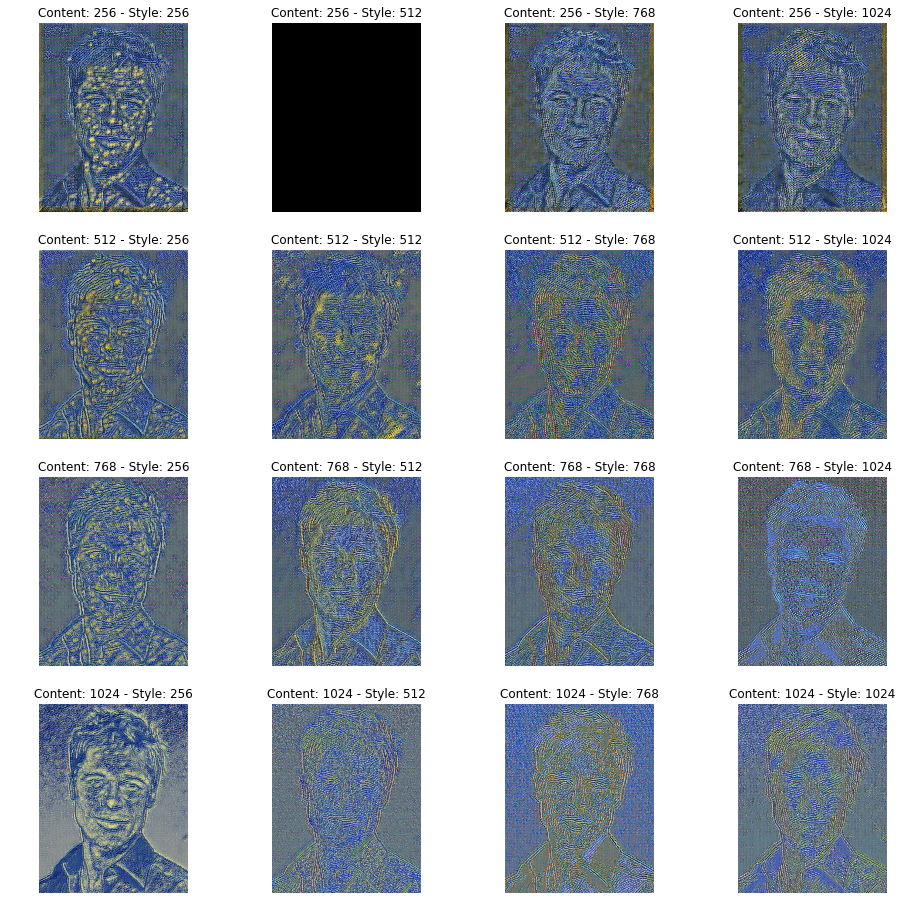

In [2]:
fig, axes = plt.subplots(len(content_sizes), len(style_sizes), figsize=(16, 16), squeeze=False)

for i, content_size in enumerate(content_sizes):
    for o, style_size in enumerate(style_sizes):
        file_path = f'{checkpoints_path}test_image_sizes__{content_size}_{style_size}.pth'
        
        if os.path.exists(file_path):    
            error = True
            
            while error:
                try:
                    if force_cpu:
                        checkpoint = torch.load(file_path, map_location={'cuda:0': 'cpu'})
                    else:
                        checkpoint = torch.load(file_path)

                    error = False
                except:
                    error = True
                
            model = StylizedNet(
                channel_multiplier=32,
                bottleneck_size=5,
                bottleneck_type=BottleneckType.RESIDUAL_BLOCK
            ).to(device)

            model.load_state_dict(checkpoint['network_state_dict'])
            model.eval()

            output = transforms.ToPILImage()(model(image.unsqueeze(0)).squeeze())

            axes[i, o].title.set_text(f'Content: {content_size} - Style: {style_size}')
            axes[i, o].imshow(output, interpolation='none')
    
        axes[i, o].axis('off')
        
fig.savefig('../images/output/test_image_sizes.png', dpi=300)
display(HTML('<a href="/tree/images/output/test_image_sizes.png">/tree/images/output/test_image_sizes.png</a>'))